In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.cluster.hierarchy as sch

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set plot style
sns.set_style('whitegrid')

In [ ]:
# Load the dataset
! git clone "https://github.com/HarshvardhanSingh-13/Datasets"
df = pd.read_csv('/content/Datasets/Mall Dataset/Mall_Customers.csv')

print("Dataset loaded successfully..")
print(f"Data shape: {df.shape}")
df.head()

fatal: destination path 'Datasets' already exists and is not an empty directory.
Dataset loaded successfully..
Data shape: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Basic info and statistics
print("Dataset Info:")
df.info()

# drop CustomerID
df.drop('CustomerID', axis=1, inplace=True)

print("\n Descriptive Statistics: ")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

 Descriptive Statistics: 
              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%    

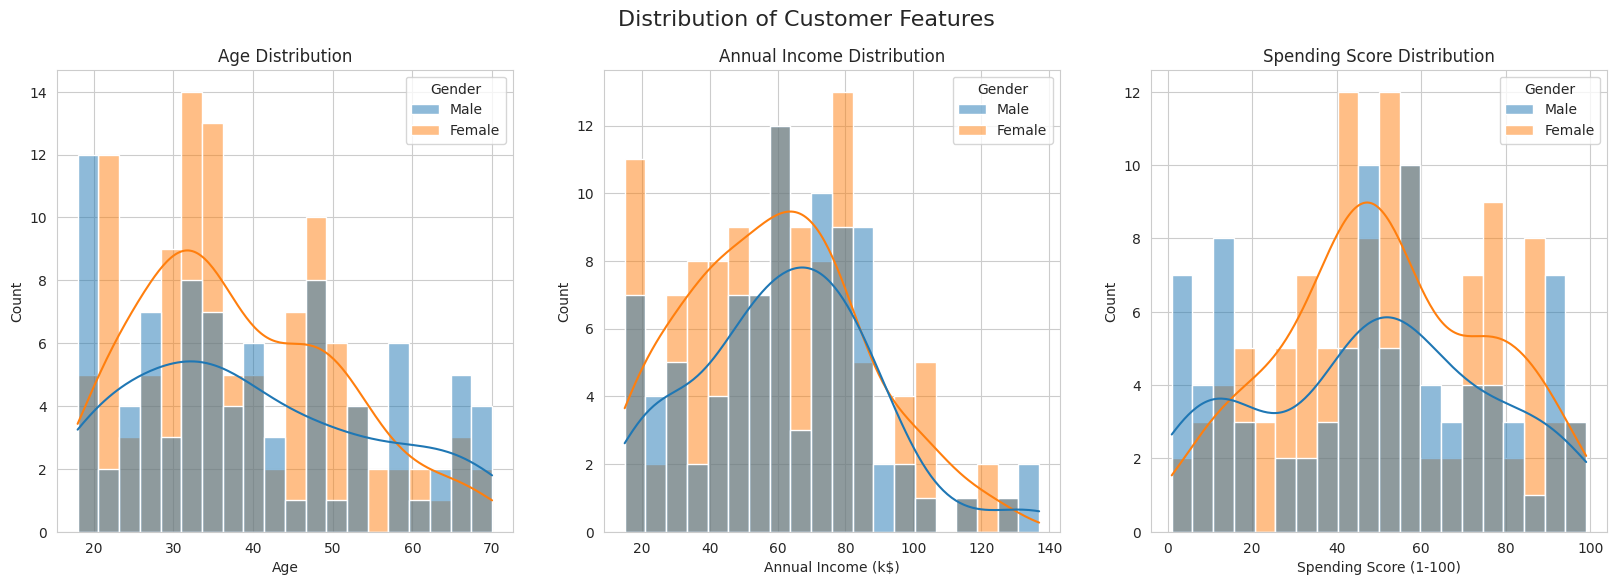

In [ ]:
# Univariate Analysis

fig, axes = plt.subplots(1, 3, figsize = (20,6))
fig.suptitle('Distribution of Customer Features', fontsize=16)

sns.histplot(ax=axes[0], data=df, x='Age', kde=True, bins=20, hue='Gender').set_title('Age Distribution')
sns.histplot(ax=axes[1], data=df, x='Annual Income (k$)', kde=True, bins=20, hue='Gender').set_title("Annual Income Distribution")
sns.histplot(ax=axes[2], data=df, x='Spending Score (1-100)', kde=True, bins=20, hue='Gender').set_title("Spending Score Distribution")

plt.show()

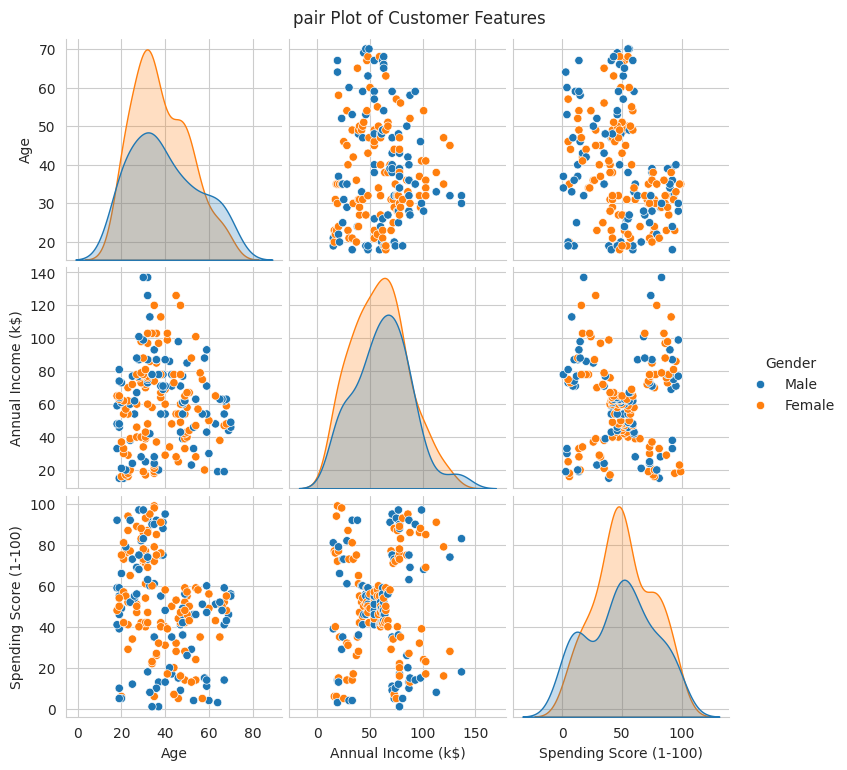

In [ ]:
#Bivariate Analysis

sns.pairplot(df, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue='Gender', diag_kind='kde')
plt.suptitle('pair Plot of Customer Features', y=1.02)
plt.show()

In [ ]:
# 3D Visualization
fig = px.scatter_3d(df,
                    x='Annual Income (k$)',
                    y='Spending Score (1-100)',
                    z='Age',
                    color='Gender',
                    title='3D View of Customer Data')
fig.show()

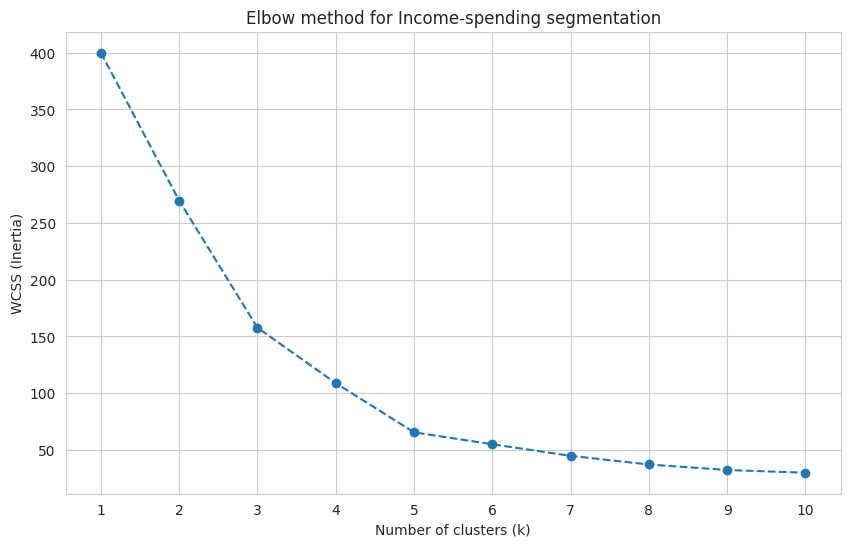

In [ ]:
# Segmentation Model 1 - Income and Spending Score

# 1. Scale the features
X1 = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler1 = StandardScaler()
X1_scaled = scaler1.fit_transform(X1)

# 2. Implement Elbow method
wcss1=[]
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
  kmeans.fit(X1_scaled)
  wcss1.append(kmeans.inertia_)

# 3. Plot the Elbow curve
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss1, marker='o', linestyle='--')
plt.title('Elbow method for Income-spending segmentation')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1,11))
plt.show()

In [ ]:
# Build and fit the final model
kmeans1 = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
df['Income_Cluster'] = kmeans1.fit_predict(X1_scaled)

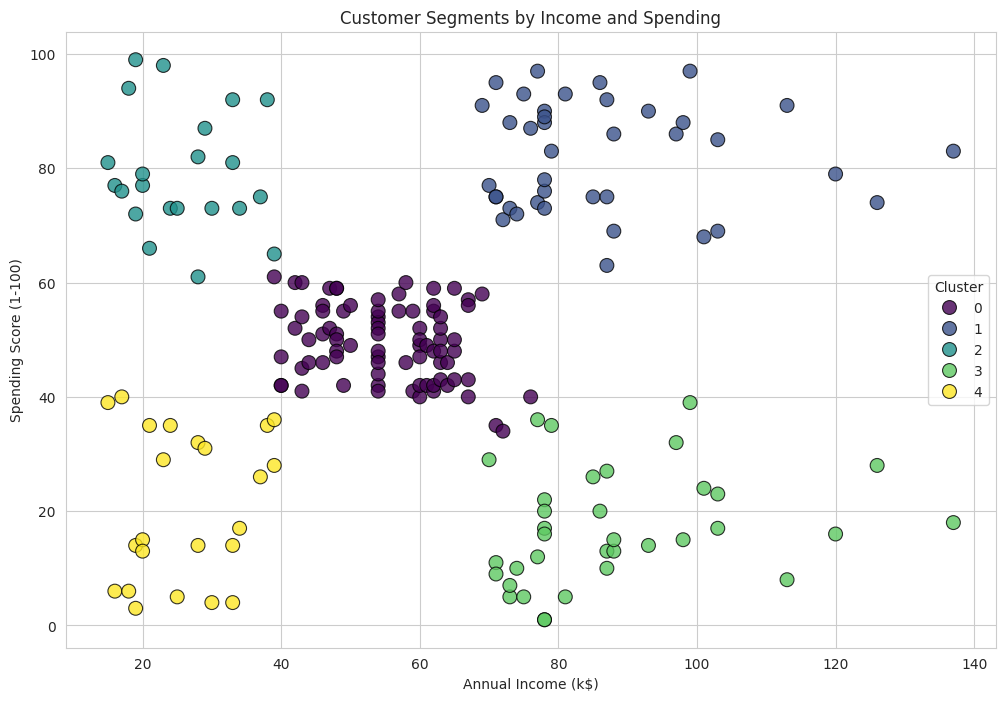

In [ ]:
# visualizing and interpreting Income based Segments

plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Income_Cluster', palette='viridis', s=100, alpha=0.8, edgecolor='black')
plt.title('Customer Segments by Income and Spending')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# Quantitative Analysis
cluster_profiles1= df.groupby('Income_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)
cluster_profiles1['Size'] = df['Income_Cluster'].value_counts()
print("---- Income Based Cluster Profiles ----")
cluster_profiles1

---- Income Based Cluster Profiles ----


,Age,Annual Income (k$),Spending Score (1-100),Size
Income_Cluster,,,,
0,42.72,55.30,49.52,81
1,32.69,86.54,82.13,39
2,25.27,25.73,79.36,22
3,41.11,88.20,17.11,35
4,45.22,26.30,20.91,23


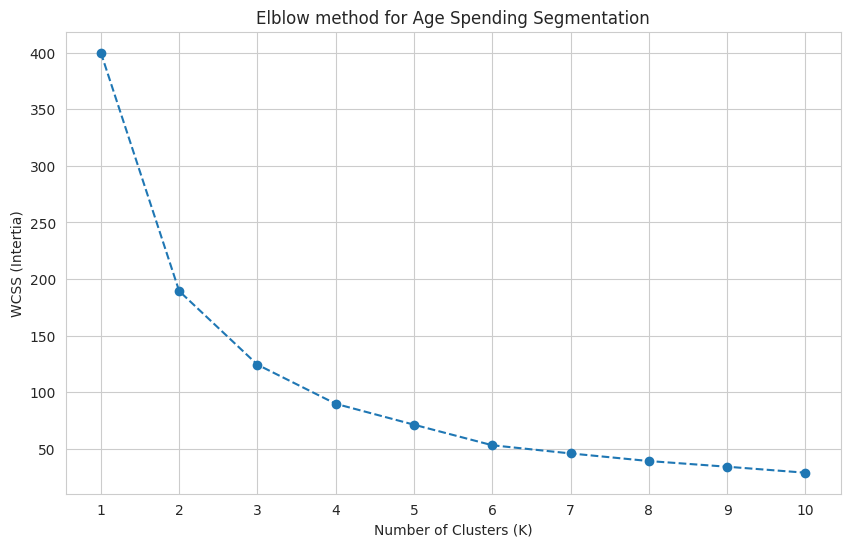

In [ ]:
# Segementation Model 2 - Age & Spending Score

# 1. Scale the features
X2=df[['Age','Spending Score (1-100)']]
scaler2=StandardScaler()
X2_scaled=scaler2.fit_transform(X2)

# 2. Implement Elblow method

wcss2=[]
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
  kmeans.fit(X2_scaled)
  wcss2.append(kmeans.inertia_)

# 3. Plot the Elbow curve
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss2, marker='o', linestyle='--')
plt.title("Elblow method for Age Spending Segmentation")
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Intertia)')
plt.xticks(range(1,11))
plt.show()

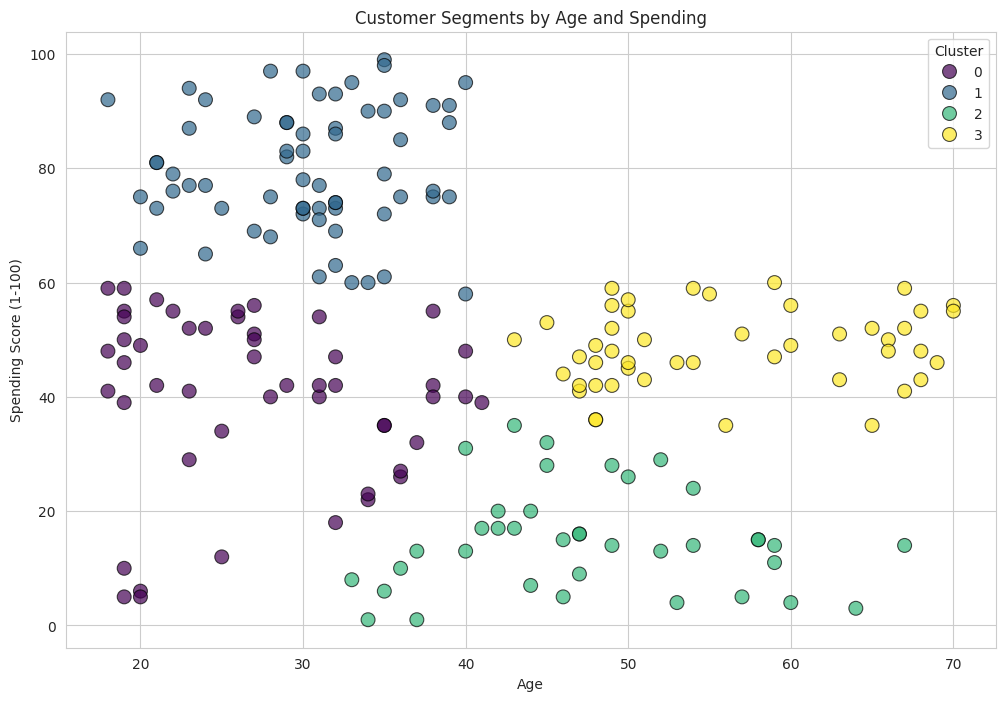

In [ ]:
# k=4 appears to be a reasonable choice

#Build and fit final model
kmeans2 = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10)
df['Age_Cluster'] = kmeans2.fit_predict(X2_scaled)

# Visualize the new cluster
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)',
                hue='Age_Cluster', palette='viridis', s=100, alpha=0.7, edgecolor='black')
plt.title('Customer Segments by Age and Spending')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# Quantitative Analysis
cluster_profiles2= df.groupby('Age_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)
cluster_profiles2['Size'] = df['Age_Cluster'].value_counts()
print("---- Income Based Cluster Profiles ----")
cluster_profiles2

---- Income Based Cluster Profiles ----


,Age,Annual Income (k$),Spending Score (1-100),Size
Age_Cluster,,,,
0,27.22,59.62,40.04,50
1,30.29,63.83,79.82,65
2,47.61,63.79,15.00,38
3,55.98,54.43,48.51,47


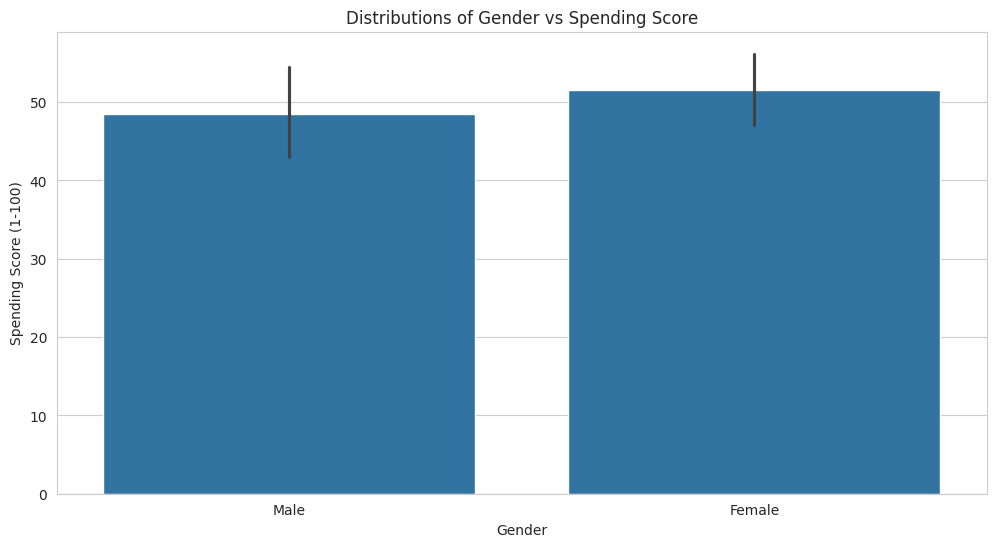

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Distributions of Gender vs Spending Score')

sns.barplot(data=df, x='Gender', y='Spending Score (1-100)')
plt.show()

**Insights:** This indicates a slightly higher spending score for females compared to males, though overlapping error bars suggest that the difference is relatively small and may not be statistically significant.

In [ ]:
# Feature Engineering
from sklearn.preprocessing import MinMaxScaler

# Create new features Age Group and Savings
df['Savings (k$)'] = df['Annual Income (k$)'] * (1 - df['Spending Score (1-100)'] / 100)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_Cluster,Age_Cluster,Savings (k$)
0,Male,19,15,39,4,0,9.15
1,Male,21,15,81,2,1,2.85
2,Female,20,16,6,4,0,15.04
3,Female,23,16,77,2,1,3.68
4,Female,31,17,40,4,0,10.20


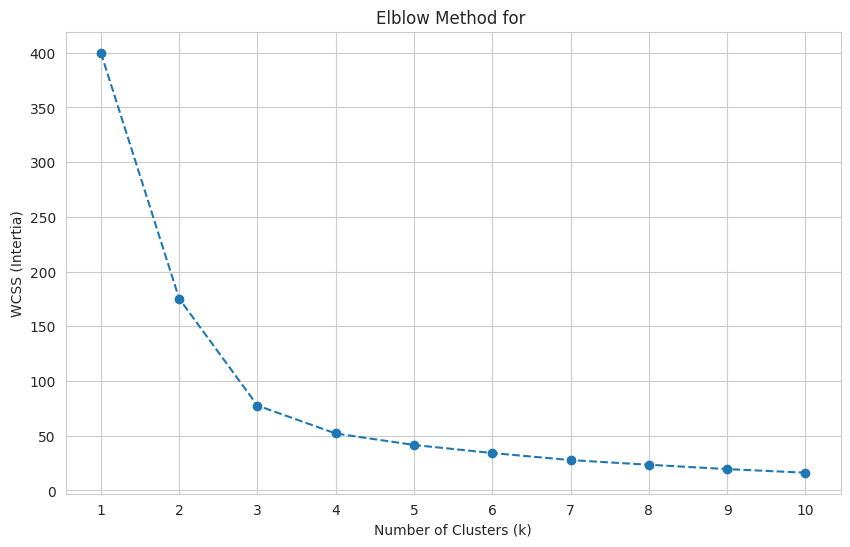

In [ ]:
# Segmentation Model on new feature Savings

# 1. Select and scale the features
X3 = df[['Spending Score (1-100)','Savings (k$)']]
scaler3 = StandardScaler()
X3_scaled = scaler3.fit_transform(X3)

# 2. Implement Elbow method
wcss3 = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
  kmeans.fit_predict(X3_scaled)
  wcss3.append(kmeans.inertia_)

# 3. Plot the Elbow curve
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss3, marker='o', linestyle='--')
plt.title('Elblow Method for ')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Intertia)')
plt.xticks(range(1,11))
plt.show()

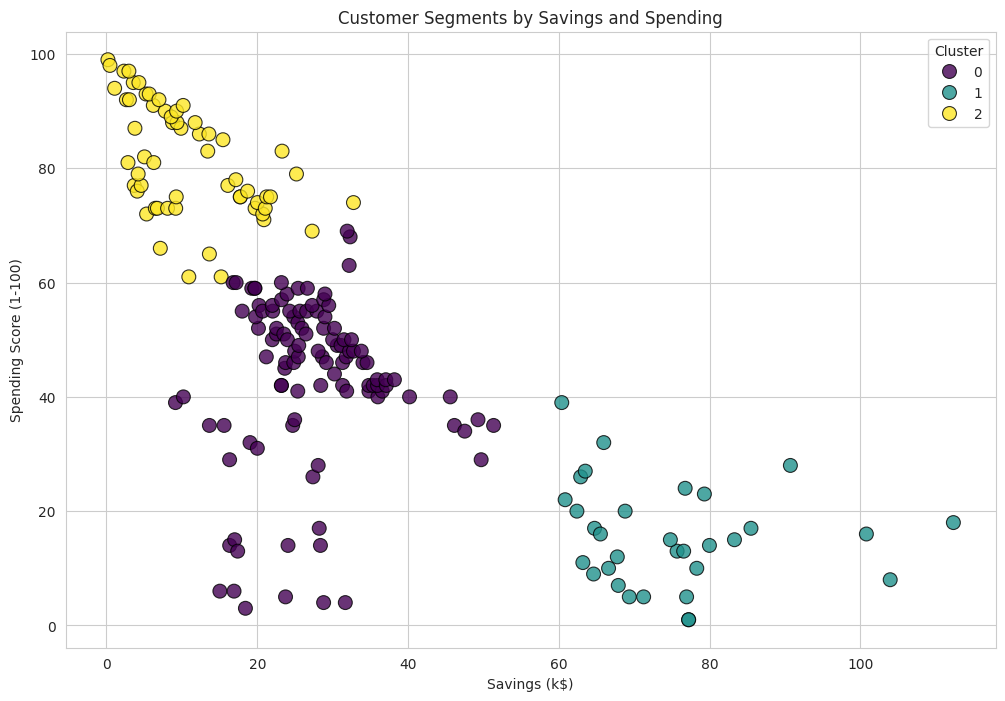

In [ ]:
# Build and fit the final model for age segmentation
kmeans3 = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
df['Savings_Cluster'] = kmeans3.fit_predict(X3_scaled)

# Visualize the new clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Savings (k$)', y='Spending Score (1-100)',
                hue='Savings_Cluster', palette='viridis', s=100, alpha=0.8, edgecolor='black')
plt.title('Customer Segments by Savings and Spending')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# Quantitative Analysis
cluster_profiles3= df.groupby('Savings_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Savings (k$)']].mean().round(2)
cluster_profiles3['Size'] = df['Savings_Cluster'].value_counts()
print("---- Savings Based Cluster Profiles ----")
cluster_profiles3

---- Savings Based Cluster Profiles ----


,Age,Annual Income (k$),Spending Score (1-100),Savings (k$),Size
Savings_Cluster,,,,,
0,43.01,51.03,43.40,27.34,109
1,41.00,89.41,15.59,74.85,32
2,30.00,62.53,81.53,10.90,59


**Interpretation:**



*   **Cluster 0:** Moderate Savers, Moderate Spenders. These customers balance saving and spending. They are average, stable customers. Likely to respond well to standard offers, loyalty programs, and upselling.
*   **Cluster 1:** High Savers, Low Spenders. Financially secure but very cautious spenders. May value long-term benefits, investments, or premium quality over frequent purchases.
*   **Cluster 2**: Low Savers, High Spenders. Likely to respond strongly to promotions, discounts, and trend-based marketing. Higher revenue potential but also higher financial risk.